In [1]:
# Importing the required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

from geopy.geocoders import Nominatim

import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# use to set style of background of plot
sns.set(style="whitegrid")
pd.set_option('display.max_colwidth', None)
%matplotlib inline

import plotly.express as px

In [2]:
!pip install geopy

In [3]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

In [4]:
df_diffdisorders  = pd.read_csv("Resources/prevalence-by-mental-and-substance-use-disorder.csv")

In [5]:
df_diffdisorders.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                  0.228979   
1                                                                  0.228120   

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.721207   
1                                                                     0.719952   

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.131001   
1                                                                     0.126395   

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                      4.835127   
1                                                                      4.821765   

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                       0.454202   
1                                                                       0.447112   

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                         5.125291   
1                                                                         5.116306   

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                                                          0.444036  
1                                                                          0.444250

In [6]:
# function to map coordinates
def get_lat_lon(country):
    
    try:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except:
        return np.nan

In [7]:
countries = df_diffdisorders ["Entity"].unique()


In [8]:
countries_lat_lon = {}

for c in countries:
    print("country: ", c)
    countries_lat_lon[c] = get_lat_lon(c)

country:  Afghanistan
country:  African Region (WHO)
country:  Albania
country:  Algeria
country:  American Samoa
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bermuda
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burundi
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Cape Verde
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Congo
country:  Cook Islands
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of 

In [9]:
countries_lat_lon

{'Afghanistan': (33.7680065, 66.2385139),
 'African Region (WHO)': nan,
 'Albania': (41.000028, 19.9999619),
 'Algeria': (28.0000272, 2.9999825),
 'American Samoa': (-14.297124, -170.7131481),
 'Andorra': (42.5407167, 1.5732033),
 'Angola': (-11.8775768, 17.5691241),
 'Antigua and Barbuda': (17.2234721, -61.9554608),
 'Argentina': (-34.9964963, -64.9672817),
 'Armenia': (40.7696272, 44.6736646),
 'Australia': (-24.7761086, 134.755),
 'Austria': (47.59397, 14.12456),
 'Azerbaijan': (40.3936294, 47.7872508),
 'Bahamas': (24.7736546, -78.0000547),
 'Bahrain': (26.1551249, 50.5344606),
 'Bangladesh': (24.4769288, 90.2934413),
 'Barbados': (13.1500331, -59.5250305),
 'Belarus': (53.4250605, 27.6971358),
 'Belgium': (50.6402809, 4.6667145),
 'Belize': (16.8259793, -88.7600927),
 'Benin': (9.5293472, 2.2584408),
 'Bermuda': (32.30382, -64.7561647),
 'Bhutan': (27.549511, 90.5119273),
 'Bolivia': (-17.0568696, -64.9912286),
 'Bosnia and Herzegovina': (44.3053476, 17.5961467),
 'Botswana': (-23

# 2nd CSV file

In [10]:
df_diffdisorders["lat_lon"] = df_diffdisorders["Entity"].map(countries_lat_lon)

In [11]:
df_diffdisorders.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                  0.228979   
1                                                                  0.228120   

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.721207   
1                                                                     0.719952   

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.131001   
1                                                                     0.126395   

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                      4.835127   
1                                                                      4.821765   

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                       0.454202   
1                                                                       0.447112   

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                         5.125291   
1                                                                         5.116306   

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                          0.444036   
1                                                                          0.444250   

                    lat_lon  
0  (33.7680065, 66.2385139)  
1  (33.7680065, 66.2385139)

In [12]:
discard_indexes = df_diffdisorders[df_diffdisorders["lat_lon"].isnull()].index
df_diffdisorders = df_diffdisorders.drop(discard_indexes)

In [13]:
df_diffdisorders["Entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'G20', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece

In [14]:
df_diffdisorders["latitude"] = df_diffdisorders["lat_lon"].map(lambda x: x[0])
df_diffdisorders["longitude"] = df_diffdisorders["lat_lon"].map(lambda x: x[1])

In [15]:
df_diffdisorders.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                  0.228979   
1                                                                  0.228120   

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.721207   
1                                                                     0.719952   

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.131001   
1                                                                     0.126395   

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                      4.835127   
1                                                                      4.821765   

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                       0.454202   
1                                                                       0.447112   

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                         5.125291   
1                                                                         5.116306   

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                          0.444036   
1                                                                          0.444250   

                    lat_lon   latitude  longitude  
0  (33.7680065, 66.2385139)  33.768006  66.238514  
1  (33.7680065, 66.2385139)  33.768006  66.238514

In [16]:
df_diffdisorders = df_diffdisorders.drop('lat_lon', axis=1)


In [17]:
df_diffdisorders.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                  0.228979   
1                                                                  0.228120   

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.721207   
1                                                                     0.719952   

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                     0.131001   
1                                                                     0.126395   

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                      4.835127   
1                                                                      4.821765   

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                       0.454202   
1                                                                       0.447112   

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                         5.125291   
1                                                                         5.116306   

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                                                          0.444036   
1                                                                          0.444250   

    latitude  longitude  
0  33.768006  66.238514  
1  33.768006  66.238514

In [18]:
df_diffdisorders.set_axis(['Country','Code','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','latitude','longitude'], axis='columns', inplace=True)

In [19]:
df_diffdisorders.head(2)

Country Code  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  AFG  1990       0.228979          0.721207         0.131001   
1  Afghanistan  AFG  1991       0.228120          0.719952         0.126395   

    Anxiety  drug_usage  depression   alcohol   latitude  longitude  
0  4.835127    0.454202    5.125291  0.444036  33.768006  66.238514  
1  4.821765    0.447112    5.116306  0.444250  33.768006  66.238514

In [20]:
df2=pd.read_csv("Resources/mental-and-substance-use-as-share-of-disease.csv")
df2.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                                                                         1.696670  
1                                                                                         1.734281

In [21]:
df2["lat_lon"] = df2["Entity"].map(countries_lat_lon)
df2.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                                                                         1.696670   
1                                                                                         1.734281   

                    lat_lon  
0  (33.7680065, 66.2385139)  
1  (33.7680065, 66.2385139)

In [22]:
discard_indexes = df2[df2["lat_lon"].isnull()].index
df2 = df2.drop(discard_indexes)
df2["latitude"] = df2["lat_lon"].map(lambda x: x[0])
df2["longitude"] = df2["lat_lon"].map(lambda x: x[1])
df2 =df2.drop('lat_lon', axis=1)
df2


Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                                                                            1.696670   
1                                                                                            1.734281   
2                                                                                            1.791189   
3                                                                                            1.776779   
4                                                                                            1.712986   
...                                                                                               ...   
6835                                                                                         2.193166   
6836                                                                                         2.279813   
6837                                                                                         2.364265   
6838                                                                                         2.472949   
6839                                                                                         2.525892   

       latitude  longitude  
0     33.768006  66.238514  
1     33.768006  66.238514  
2     33.768006  66.238514  
3     33.768006  66.238514  
4     33.768006  66.238514  
...         ...        ...  
6835 -18.455496  29.746841  
6836 -18.455496  29.746841  
6837 -18.455496  29.746841  
6838 -18.455496  29.746841  
6839 -18.455496  29.746841  

[6360 rows x 6 columns]

In [23]:
 df2 =df2.rename(columns={ 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)':'AgeYears_lost','Entity' : 'Country'})

In [24]:
data = pd.merge(df_diffdisorders, df2)
data.head()

Country Code  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  AFG  1990       0.228979          0.721207         0.131001   
1  Afghanistan  AFG  1991       0.228120          0.719952         0.126395   
2  Afghanistan  AFG  1992       0.227328          0.718418         0.121832   
3  Afghanistan  AFG  1993       0.226468          0.717452         0.117942   
4  Afghanistan  AFG  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol   latitude  longitude  \
0  4.835127    0.454202    5.125291  0.444036  33.768006  66.238514   
1  4.821765    0.447112    5.116306  0.444250  33.768006  66.238514   
2  4.801434    0.441190    5.106558  0.445501  33.768006  66.238514   
3  4.789363    0.435581    5.100328  0.445958  33.768006  66.238514   
4  4.784923    0.431822    5.099424  0.445779  33.768006  66.238514   

   AgeYears_lost  
0       1.696670  
1       1.734281  
2       1.791189  
3       1.776779  
4       1.712986

In [25]:
data.drop('Code',axis=1,inplace=True)

In [26]:
data.head(2)

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   

    Anxiety  drug_usage  depression   alcohol   latitude  longitude  \
0  4.835127    0.454202    5.125291  0.444036  33.768006  66.238514   
1  4.821765    0.447112    5.116306  0.444250  33.768006  66.238514   

   AgeYears_lost  
0       1.696670  
1       1.734281

In [27]:
data.to_csv('Clean_data/merged_data.csv', index=False)

# EXPLORATORY ANALYSIS

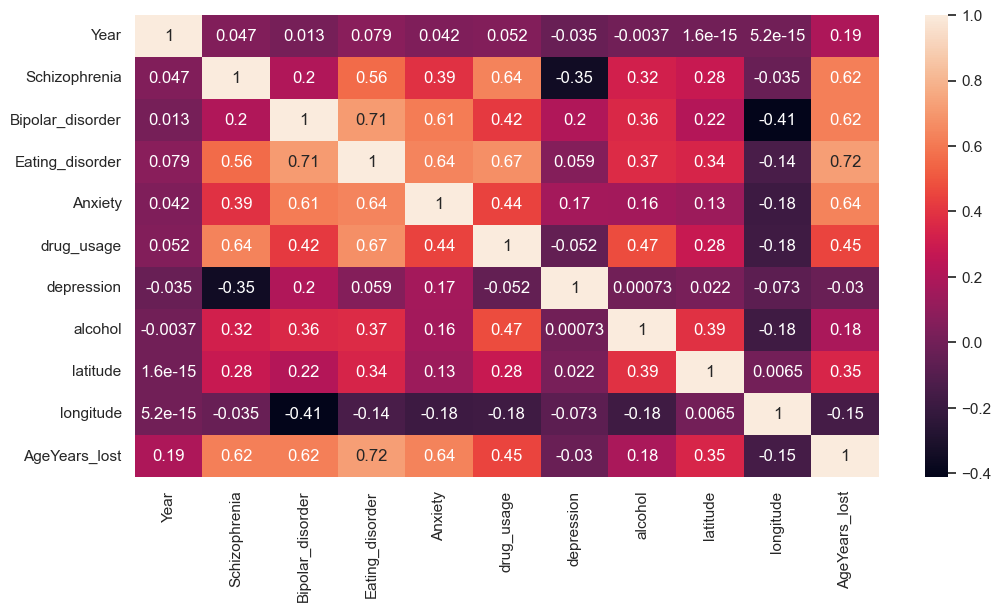

<Figure size 640x480 with 0 Axes>

In [28]:
#checking for correlation among data

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.savefig("./Images/correlation_matrix")

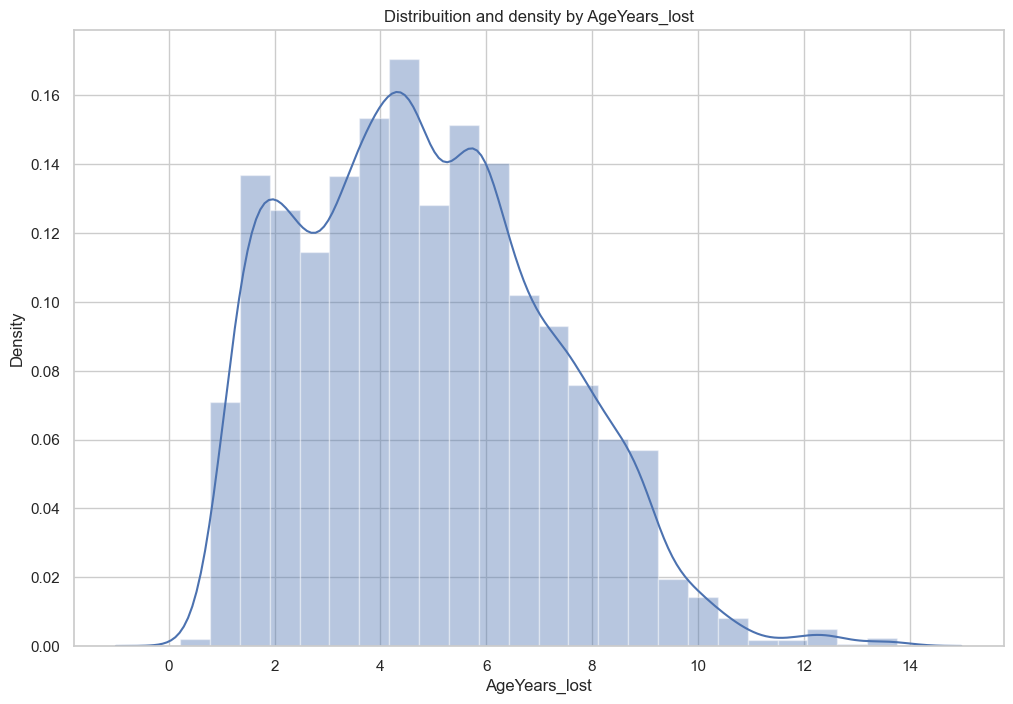

In [29]:
# Distribiution and density by mental_fitness
plt.figure(figsize=(12,8))
sns.distplot(data['AgeYears_lost'], bins=24)
plt.title("Distribuition and density by AgeYears_lost")
plt.xlabel("AgeYears_lost")
plt.savefig("./Images/AgeYears_lost_distribution")

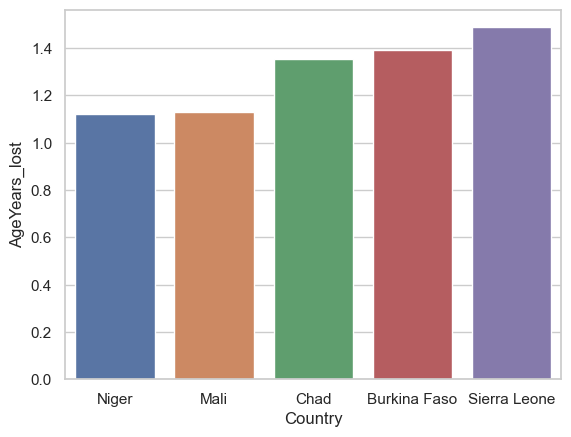

In [30]:
# Highest disease burden countries 

data1=data.groupby('Country')['AgeYears_lost'].mean().reset_index().sort_values('AgeYears_lost', ascending = True).head(5)
sns.barplot(data=data1,x='Country',y='AgeYears_lost')
plt.savefig("./Images/AgeYears_lost_country")

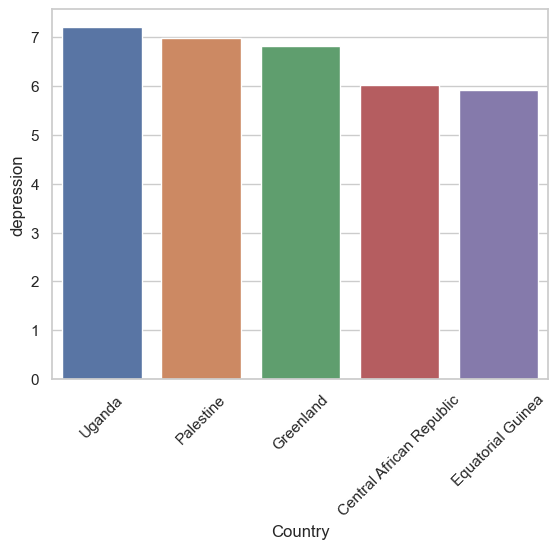

<Figure size 640x480 with 0 Axes>

In [31]:
# Top 5 Countries with low rate of depressive disorder 

data3=data.groupby('Country')['depression'].mean().reset_index().sort_values('depression',ascending = False).head(5)
sns.barplot(data=data3,x='Country',y='depression')
plt.xticks(rotation=45)
plt.show()
plt.savefig("./Images/country_depression")

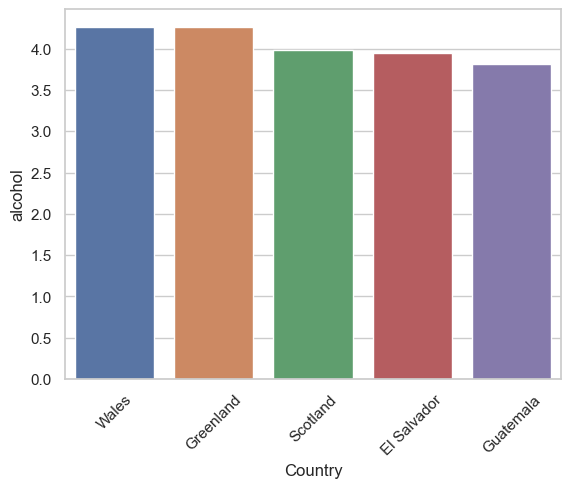

<Figure size 640x480 with 0 Axes>

In [32]:
#Top 5 countries where alcohol use disorder is high

data4=data.groupby('Country')['alcohol'].mean().reset_index().sort_values('alcohol',ascending = False).head(5)
sns.barplot(data=data4,x='Country',y='alcohol')
plt.xticks(rotation=45)
plt.show()
plt.savefig("./Images/country_alcohol")

<Figure size 1200x600 with 0 Axes>

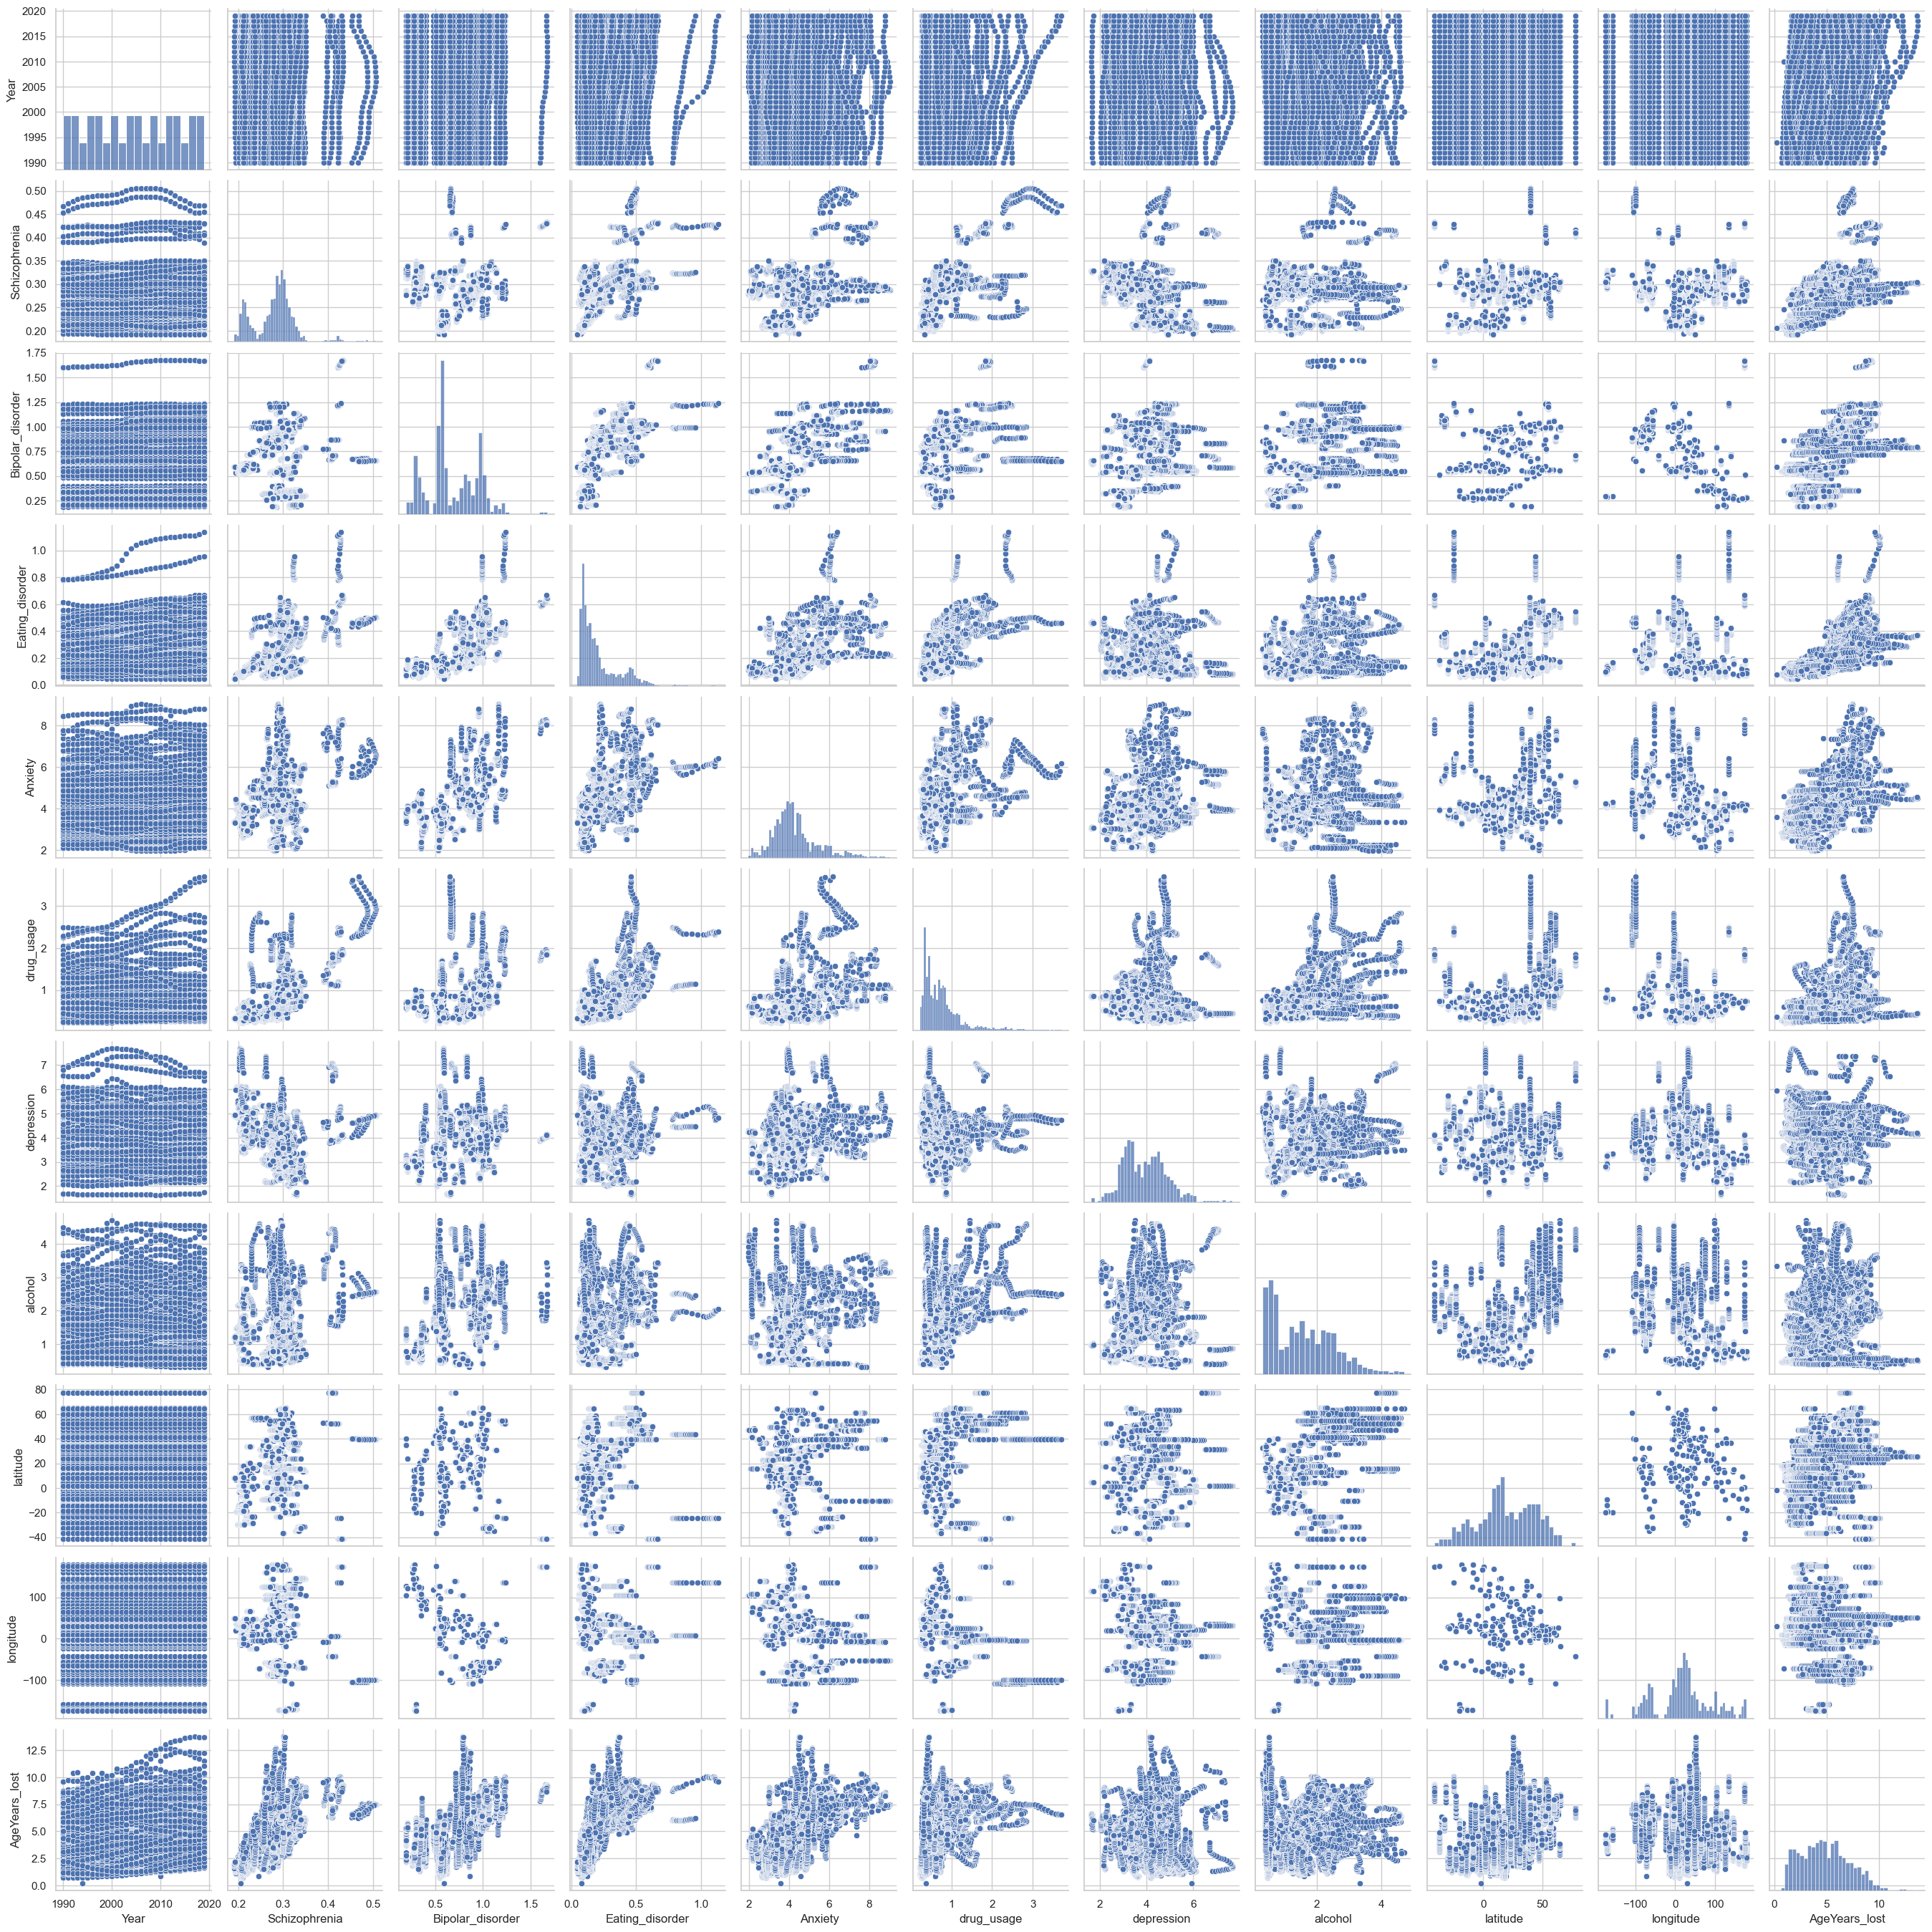

In [33]:
#correlation among data

plt.figure(figsize=(12,6))
sns.pairplot(data)
plt.show()

# Data Analysis

In [34]:
data.shape

(6360, 12)

In [35]:
data.describe()

Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
count  6360.000000    6360.000000       6360.000000      6360.000000   
mean   2004.500000       0.280457          0.677375         0.211707   
std       8.656122       0.047635          0.261095         0.155117   
min    1990.000000       0.191621          0.189344         0.045425   
25%    1997.000000       0.253233          0.540804         0.099229   
50%    2004.500000       0.286928          0.591893         0.153740   
75%    2012.000000       0.304083          0.920298         0.269979   
max    2019.000000       0.506018          1.676204         1.136541   

           Anxiety   drug_usage   depression      alcohol     latitude  \
count  6360.000000  6360.000000  6360.000000  6360.000000  6360.000000   
mean      4.325923     0.743468     3.951268     1.580498    19.093876   
std       1.196131     0.466397     0.942308     0.953140    24.522232   
min       1.974823     0.225471     1.640902     0.319900   -41.500083   
25%       3.585601     0.417502     3.239808     0.709733     4.130956   
50%       4.088785     0.641441     3.904117     1.478478    17.236992   
75%       4.768567     0.881148     4.561605     2.265718    39.692556   
max       9.015948     3.699504     7.688213     4.698694    77.619235   

         longitude  AgeYears_lost  
count  6360.000000    6360.000000  
mean     18.065188       4.835190  
std      72.725041       2.330101  
min    -175.202642       0.215647  
25%     -10.991276       2.999617  
50%      19.758111       4.649211  
75%      51.922018       6.408069  
max     179.158292      13.761517

# checking for null values in data

In [36]:
data.isnull().sum()

Country             0
Year                0
Schizophrenia       0
Bipolar_disorder    0
Eating_disorder     0
Anxiety             0
drug_usage          0
depression          0
alcohol             0
latitude            0
longitude           0
AgeYears_lost       0
dtype: int64

# checking for data type

In [37]:
data.dtypes

Country              object
Year                  int64
Schizophrenia       float64
Bipolar_disorder    float64
Eating_disorder     float64
Anxiety             float64
drug_usage          float64
depression          float64
alcohol             float64
latitude            float64
longitude           float64
AgeYears_lost       float64
dtype: object

# Checking for duplicated values

In [38]:
data.duplicated().sum()

0

# Convert text data into numeric

In [39]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

In [40]:
data

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0           0  1990       0.228979          0.721207         0.131001   
1           0  1991       0.228120          0.719952         0.126395   
2           0  1992       0.227328          0.718418         0.121832   
3           0  1993       0.226468          0.717452         0.117942   
4           0  1994       0.225567          0.717012         0.114547   
...       ...   ...            ...               ...              ...   
6355      211  2015       0.209359          0.560882         0.099610   
6356      211  2016       0.209979          0.561768         0.100821   
6357      211  2017       0.210631          0.562612         0.101671   
6358      211  2018       0.211237          0.563283         0.102398   
6359      211  2019       0.211969          0.563820         0.102902   

       Anxiety  drug_usage  depression   alcohol   latitude  longitude  \
0     4.835127    0.454202    5.125291  0.444036  33.768006  66.238514   
1     4.821765    0.447112    5.116306  0.444250  33.768006  66.238514   
2     4.801434    0.441190    5.106558  0.445501  33.768006  66.238514   
3     4.789363    0.435581    5.100328  0.445958  33.768006  66.238514   
4     4.784923    0.431822    5.099424  0.445779  33.768006  66.238514   
...        ...         ...         ...       ...        ...        ...   
6355  3.315701    0.599604    3.548613  1.734969 -18.455496  29.746841   
6356  3.324230    0.603658    3.557508  1.689281 -18.455496  29.746841   
6357  3.330569    0.608096    3.564138  1.651805 -18.455496  29.746841   
6358  3.317500    0.609065    3.563141  1.686711 -18.455496  29.746841   
6359  3.283934    0.610644    3.554571  1.776729 -18.455496  29.746841   

      AgeYears_lost  
0          1.696670  
1          1.734281  
2          1.791189  
3          1.776779  
4          1.712986  
...             ...  
6355       2.193166  
6356       2.279813  
6357       2.364265  
6358       2.472949  
6359       2.525892  

[6360 rows x 12 columns]

In [41]:
# created a dataframe to extract summary 

summary= pd.DataFrame(index =['LR','KNN', 'SVR', 'XGBOOST', 'Random Forest','Decision Tree'],columns=['MSE','RMSE','accuracy']) 


# Split the data

In [42]:
X = data.drop('AgeYears_lost',axis=1)
y = data['AgeYears_lost']

# Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

In [44]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
predicted = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, predicted)
print(f"mean squared error (MSE): {mse}")
summary.loc['LR','MSE']=mean_squared_error(y_test, predicted)

print("RMSE for LR: ",mean_squared_error(y_test, predicted, squared=False))
summary.loc['LR','RMSE']=mean_squared_error(y_test, predicted, squared=False)

r2 = r2_score(y_test, predicted)
print("accuracy for LR: ",r2_score(y_test, predicted))
summary.loc['LR','accuracy']=r2_score(y_test, predicted)

mean squared error (MSE): 1.3402553005702573
RMSE for LR:  1.157693958077979
accuracy for LR:  0.7592516652387173


In [48]:
from sklearn.neighbors import KNeighborsRegressor

k: 1, Train/Test Score: 1.000/0.994
k: 3, Train/Test Score: 0.998/0.995
k: 5, Train/Test Score: 0.996/0.993
k: 7, Train/Test Score: 0.993/0.990
k: 9, Train/Test Score: 0.989/0.985
k: 11, Train/Test Score: 0.984/0.978
k: 13, Train/Test Score: 0.977/0.970
k: 15, Train/Test Score: 0.969/0.961
k: 17, Train/Test Score: 0.959/0.951
k: 19, Train/Test Score: 0.947/0.940


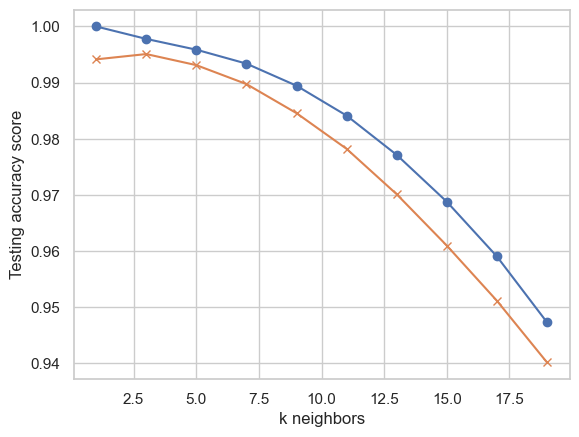

<Figure size 640x480 with 0 Axes>

In [50]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()
plt.savefig("./Images/k_neighbours5")

# Using Different Machine Learning Models

# 1 KNN ALGORITHM

In [51]:

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_score(y_test, y_pred_knn)

print("MSE for KNN: ",mean_squared_error(y_test, y_pred_knn))
summary.loc['KNN','MSE']=mean_squared_error(y_test, y_pred_knn)

print("RMSE for KNN: ",mean_squared_error(y_test, y_pred_knn, squared=False))
summary.loc['KNN','RMSE']=mean_squared_error(y_test, y_pred_knn, squared=False)

print("accuracy for KNN: ",r2_score(y_test, y_pred_knn))
summary.loc['KNN','accuracy']=r2_score(y_test, y_pred_knn)

MSE for KNN:  0.03838406063252488
RMSE for KNN:  0.19591850507934383
accuracy for KNN:  0.9931051205880517


# 2 SVR ALGORITHM

In [52]:
from sklearn.svm import SVR
svr=SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
r2_score(y_test, y_pred_svr)


print("MSE for SVR: ",mean_squared_error(y_test, y_pred_svr))
summary.loc['SVR','MSE']=mean_squared_error(y_test, y_pred_svr)

print("RMSE for SVR: ",mean_squared_error(y_test, y_pred_svr, squared=False))
summary.loc['SVR','RMSE']=mean_squared_error(y_test, y_pred_svr, squared=False)


print("accuracy for SVR: ",r2_score(y_test, y_pred_svr))
summary.loc['SVR','accuracy']=r2_score(y_test, y_pred_svr)

MSE for SVR:  5.037553047842277
RMSE for SVR:  2.244449386340061
accuracy for SVR:  0.09511082924004655


# 3 XGBOOST ALGORITHM

In [53]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=200)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
r2_score(y_test, y_pred_xgb)

print("MSE for XGBOOST: ",mean_squared_error(y_test, y_pred_xgb))
summary.loc['XGBOOST','MSE']=mean_squared_error(y_test, y_pred_xgb)

print("RMSE for XGBOOST: ",mean_squared_error(y_test, y_pred_xgb, squared=False))
summary.loc['XGBOOST','RMSE']=mean_squared_error(y_test, y_pred_xgb, squared=False)

print("accuracy for XGBOOST: ",r2_score(y_test, y_pred_xgb))
summary.loc['XGBOOST','accuracy']=r2_score(y_test, y_pred_xgb)

MSE for XGBOOST:  0.03378287092748911
RMSE for XGBOOST:  0.18380117226908296
accuracy for XGBOOST:  0.9939316263731337


# 4 RANDOM FOREST ALGORITHM

In [54]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(n_estimators=100)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)
r2_score(y_test, y_pred_random)


print("MSE for Random Forest: ",mean_squared_error(y_test, y_pred_random))
summary.loc['Random Forest','MSE']=mean_squared_error(y_test, y_pred_random)

print("RMSE for Random Forest: ",mean_squared_error(y_test, y_pred_random, squared=False))
summary.loc['Random Forest','RMSE']=mean_squared_error(y_test, y_pred_random, squared=False)


print("accuracy for Random Forest: ",r2_score(y_test, y_pred_random))
summary.loc['Random Forest','accuracy']=r2_score(y_test, y_pred_random)

MSE for Random Forest:  0.02912202672681851
RMSE for Random Forest:  0.17065177035946189
accuracy for Random Forest:  0.9947688478184925


# 6 DECISION TREE REGRESSOR ALGORITHM

In [55]:
from sklearn.tree import DecisionTreeRegressor
des=DecisionTreeRegressor()
des.fit(X_train, y_train)
y_pred_decision = des.predict(X_test)
r2_score(y_test, y_pred_decision)


print("MSE for Decision Tree: ",mean_squared_error(y_test, y_pred_decision))
summary.loc['Decision Tree','MSE']=mean_squared_error(y_test, y_pred_decision)

print("RMSE for Decision Tree: ",mean_squared_error(y_test, y_pred_decision, squared=False))
summary.loc['Decision Tree','RMSE']=mean_squared_error(y_test, y_pred_decision, squared=False)


print("accuracy for Decision Tree: ",r2_score(y_test, y_pred_decision))
summary.loc['Decision Tree','accuracy']=r2_score(y_test, y_pred_decision)

MSE for Decision Tree:  0.05648649962942731
RMSE for Decision Tree:  0.23766888654055524
accuracy for Decision Tree:  0.9898534027684932


# Summary of our all algorithms

In [56]:
print(" Summary of all algorithms are given below \n")
 
summary

 Summary of all algorithms are given below 



MSE      RMSE  accuracy
LR             1.340255  1.157694  0.759252
KNN            0.038384  0.195919  0.993105
SVR            5.037553  2.244449  0.095111
XGBOOST        0.033783  0.183801  0.993932
Random Forest  0.029122  0.170652  0.994769
Decision Tree  0.056486  0.237669  0.989853

# Visualizations for Random Forest

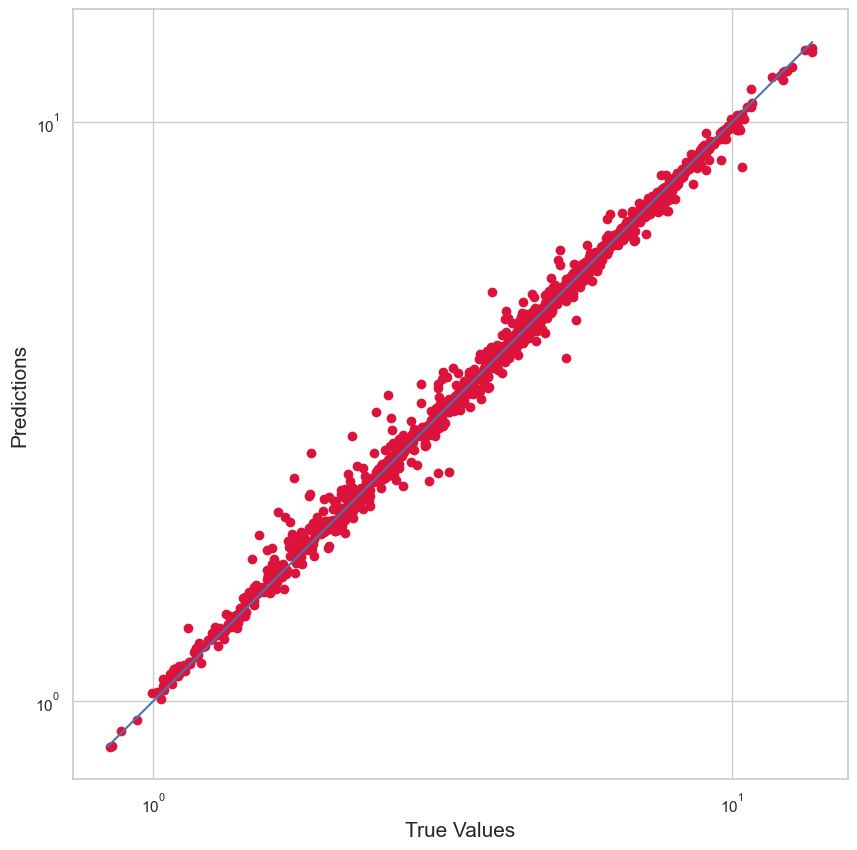

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_random, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_random), max(y_test))
p2 = min(min(y_pred_random), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
plt.savefig("./Images/Randomforest_visual")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


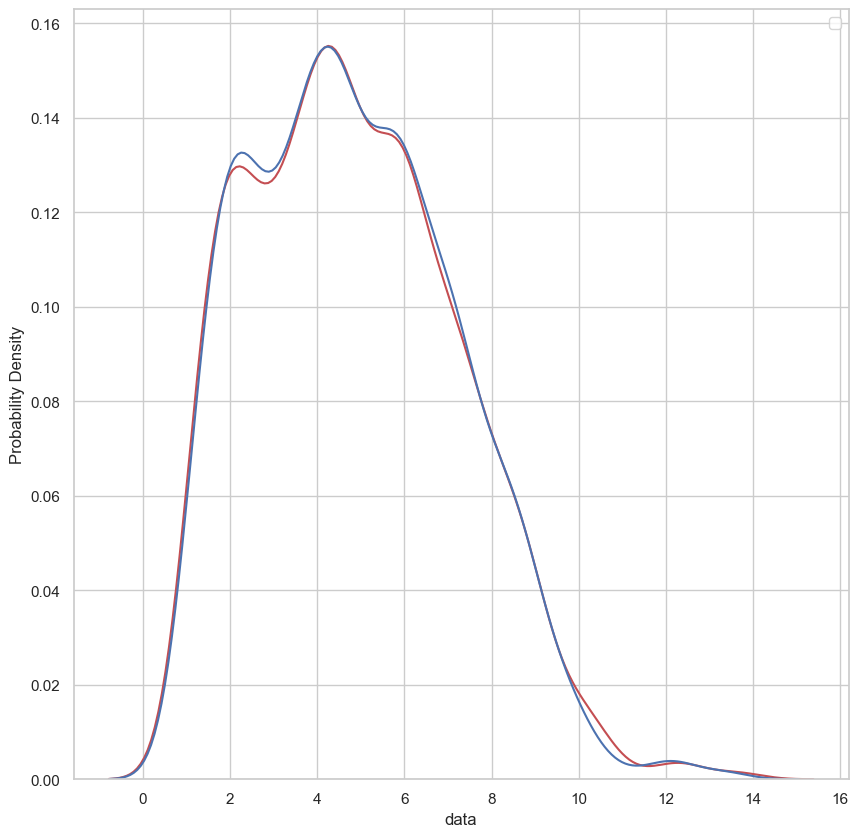

<Figure size 640x480 with 0 Axes>

In [60]:
# Plotting the KDE Plot

# red: actual    blue:predicted

plt.figure(figsize=(10,10))
sns.kdeplot(y_test, color='r')

sns.kdeplot(y_pred_random,color='b')

plt.xlabel('data')
plt.ylabel('Probability Density')

plt.legend()

plt.show()
plt.savefig("./Images/kde_plot")

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
model_params = {
    'svr': {
        'model': SVR(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,200]
        }
    },
    'knn' : {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1,5,10]
        }
    },
    'decision tree' : {
        'model': DecisionTreeRegressor(),
        'params': {
              'max_depth':[3,5],
              'min_samples_leaf':[3,5],
              'min_samples_split':[8,10]
        }
    },
    'xgboost' : {
        'model': XGBRegressor(),
        'params': {
           'n_estimators': [1,5,10]
        }
    }
}

In [63]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_hyper = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_hyper

model  best_score  \
0            svr    0.973757   
1  random_forest    0.990989   
2            knn    0.992494   
3  decision tree    0.873475   
4        xgboost    0.967473   

                                                        best_params  
0                                        {'C': 10, 'kernel': 'rbf'}  
1                                             {'n_estimators': 200}  
2                                                {'n_neighbors': 1}  
3  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}  
4                                              {'n_estimators': 10}

In [65]:
df_hyper.to_csv('summary_hyperpara.csv', index=False) 

In [73]:
# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [74]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))


model.compile(optimizer='adam',loss='mse')

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
38/38 [==============================] - 1s 5ms/step - loss: 10.0996 - val_loss: 5.5332
Epoch 2/400
38/38 [==============================] - 0s 2ms/step - loss: 5.3336 - val_loss: 5.4668
Epoch 3/400
38/38 [==============================] - 0s 2ms/step - loss: 5.3659 - val_loss: 5.5584
Epoch 4/400
38/38 [==============================] - 0s 2ms/step - loss: 5.2593 - val_loss: 5.3625
Epoch 5/400
38/38 [==============================] - 0s 2ms/step - loss: 5.2141 - val_loss: 5.3436
Epoch 6/400
38/38 [==============================] - 0s 2ms/step - loss: 5.1581 - val_loss: 5.3364
Epoch 7/400
38/38 [==============================] - 0s 2ms/step - loss: 5.0959 - val_loss: 5.3018
Epoch 8/400
38/38 [==============================] - 0s 2ms/step - loss: 5.0940 - val_loss: 5.1496
Epoch 9/400
38/38 [==============================] - 0s 3ms/step - loss: 5.0265 - val_loss: 5.2943
Epoch 10/400
38/38 [==============================] - 0s 2ms/step - loss: 4.9978 - val_loss: 5.0208
Epoch 11

38/38 [==============================] - 0s 2ms/step - loss: 2.0625 - val_loss: 2.2389
Epoch 84/400
38/38 [==============================] - 0s 2ms/step - loss: 2.2698 - val_loss: 2.0680
Epoch 85/400
38/38 [==============================] - 0s 2ms/step - loss: 2.1284 - val_loss: 2.2094
Epoch 86/400
38/38 [==============================] - 0s 2ms/step - loss: 1.9604 - val_loss: 2.1118
Epoch 87/400
38/38 [==============================] - 0s 2ms/step - loss: 2.1665 - val_loss: 1.9573
Epoch 88/400
38/38 [==============================] - 0s 2ms/step - loss: 1.9760 - val_loss: 1.7907
Epoch 89/400
38/38 [==============================] - 0s 2ms/step - loss: 1.9682 - val_loss: 2.0059
Epoch 90/400
38/38 [==============================] - 0s 2ms/step - loss: 2.0980 - val_loss: 1.8098
Epoch 91/400
38/38 [==============================] - 0s 2ms/step - loss: 2.0094 - val_loss: 1.7784
Epoch 92/400
38/38 [==============================] - 0s 3ms/step - loss: 1.8252 - val_loss: 2.4164
Epoch 93/400


38/38 [==============================] - 0s 2ms/step - loss: 1.2585 - val_loss: 1.8182
Epoch 165/400
38/38 [==============================] - 0s 2ms/step - loss: 1.6850 - val_loss: 1.6506
Epoch 166/400
38/38 [==============================] - 0s 2ms/step - loss: 1.3806 - val_loss: 1.4301
Epoch 167/400
38/38 [==============================] - 0s 2ms/step - loss: 2.2265 - val_loss: 1.3692
Epoch 168/400
38/38 [==============================] - 0s 2ms/step - loss: 1.4006 - val_loss: 1.4854
Epoch 169/400
38/38 [==============================] - 0s 2ms/step - loss: 1.1911 - val_loss: 1.1344
Epoch 170/400
38/38 [==============================] - 0s 2ms/step - loss: 1.1259 - val_loss: 1.5786
Epoch 171/400
38/38 [==============================] - 0s 2ms/step - loss: 1.3406 - val_loss: 1.2206
Epoch 172/400
38/38 [==============================] - 0s 2ms/step - loss: 1.3028 - val_loss: 1.1678
Epoch 173/400
38/38 [==============================] - 0s 2ms/step - loss: 1.1510 - val_loss: 1.1582
Epoc

38/38 [==============================] - 0s 2ms/step - loss: 1.2806 - val_loss: 1.1285
Epoch 246/400
38/38 [==============================] - 0s 2ms/step - loss: 1.0889 - val_loss: 1.0821
Epoch 247/400
38/38 [==============================] - 0s 3ms/step - loss: 1.0189 - val_loss: 0.9925
Epoch 248/400
38/38 [==============================] - 0s 2ms/step - loss: 1.1016 - val_loss: 1.0676
Epoch 249/400
38/38 [==============================] - 0s 2ms/step - loss: 1.0004 - val_loss: 1.0312
Epoch 250/400
38/38 [==============================] - 0s 2ms/step - loss: 0.9446 - val_loss: 1.4259
Epoch 251/400
38/38 [==============================] - 0s 2ms/step - loss: 1.1458 - val_loss: 1.1984
Epoch 252/400
38/38 [==============================] - 0s 2ms/step - loss: 0.9765 - val_loss: 1.3603
Epoch 253/400
38/38 [==============================] - 0s 2ms/step - loss: 1.0587 - val_loss: 1.2373
Epoch 254/400
38/38 [==============================] - 0s 2ms/step - loss: 1.0036 - val_loss: 1.0168
Epoc

38/38 [==============================] - 0s 2ms/step - loss: 0.9480 - val_loss: 0.9454
Epoch 327/400
38/38 [==============================] - 0s 2ms/step - loss: 0.8827 - val_loss: 0.9919
Epoch 328/400
38/38 [==============================] - 0s 3ms/step - loss: 0.9435 - val_loss: 0.9199
Epoch 329/400
38/38 [==============================] - 0s 3ms/step - loss: 0.8610 - val_loss: 0.8927
Epoch 330/400
38/38 [==============================] - 0s 2ms/step - loss: 1.2277 - val_loss: 1.3390
Epoch 331/400
38/38 [==============================] - 0s 3ms/step - loss: 1.0449 - val_loss: 0.9894
Epoch 332/400
38/38 [==============================] - 0s 2ms/step - loss: 0.9942 - val_loss: 1.0335
Epoch 333/400
38/38 [==============================] - 0s 2ms/step - loss: 1.0618 - val_loss: 1.1005
Epoch 334/400
38/38 [==============================] - 0s 2ms/step - loss: 0.9535 - val_loss: 0.9504
Epoch 335/400
38/38 [==============================] - 0s 2ms/step - loss: 0.8880 - val_loss: 0.9530
Epoc

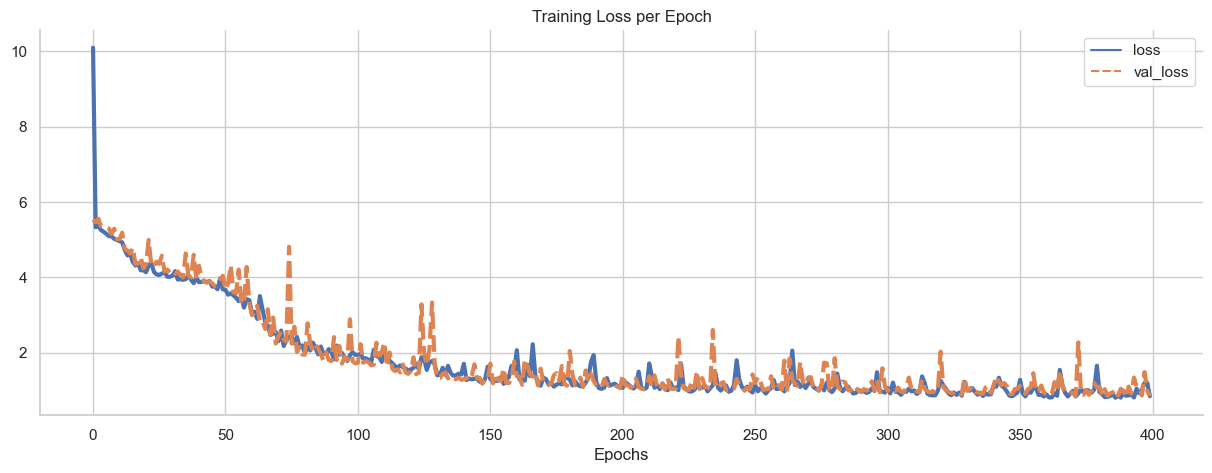

In [75]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()
plt.savefig("./Images/nnloss_epoch")

In [76]:
predictions = model.predict(X_test)


summary.loc['ANN','MSE']=mean_squared_error(y_test,predictions)
summary.loc['ANN','RMSE']=mean_squared_error(y_test,predictions,squared=False)
summary.loc['ANN','accuracy']=r2_score(y_test, predictions)

50/50 [==============================] - 0s 842us/step


In [77]:
summary.to_excel("summary.xlsx")

print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Load data into pickle file

In [78]:
import pickle

In [79]:
with open('model_pickle','wb') as f:
  pickle.dump(random,f)

In [80]:
with open('model_pickle','rb') as f:
  rf=pickle.load(f)

# prediction for sample data

In [81]:
ss=X_test.reset_index(drop=True).iloc[10].to_list()

In [82]:
prediction=model.predict(pd.DataFrame([ss], columns=['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder','Eating_disorder', 'Anxiety', 'drug_usage','depression', 'alcohol','latitude','longitude' ]))

1/1 [==============================] - 0s 21ms/step


In [83]:
print("Your prediction based on data",ss," is -->", prediction)

Your prediction based on data [167.0, 2000.0, 0.34199013731367, 0.7695947002782, 0.39380982192001, 3.02543192344088, 0.83818287140295, 2.85883427741872, 0.69736949676558, 1.357107, 103.8194992]  is --> [[8.200113]]
